## IMPORT THE NECESSARY LIBRARIES


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

## READ THE DATASET

In [53]:
df = pd.read_csv('/content/spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## PREPROCESSING THE DATASET

In [54]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [55]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [56]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [58]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

## CREATE MODELS & ADD LAYERS

In [59]:
inputs = Input(shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)
layer = LSTM(128)(layer)
layer = Dense(128)(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1)(layer)
layer = Activation('sigmoid')(layer)
model = Model(inputs=inputs,outputs=layer)


In [60]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 128)               91648     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129 

## COMPILING THE MODEL

In [61]:
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

## TRAINING THE MODEL

In [62]:
history = model.fit(sequences_matrix,Y_train,batch_size=20,epochs=15,
          validation_split=0.2)

Epoch 1/15
168/168 [==============================] - 35s 191ms/step - loss: 0.1672 - accuracy: 0.9450 - val_loss: 0.0527 - val_accuracy: 0.9844
Epoch 2/15
168/168 [==============================] - 31s 187ms/step - loss: 0.0391 - accuracy: 0.9880 - val_loss: 0.0389 - val_accuracy: 0.9928
Epoch 3/15
168/168 [==============================] - 32s 191ms/step - loss: 0.0223 - accuracy: 0.9943 - val_loss: 0.0448 - val_accuracy: 0.9868
Epoch 4/15
168/168 [==============================] - 33s 197ms/step - loss: 0.0158 - accuracy: 0.9958 - val_loss: 0.0399 - val_accuracy: 0.9868
Epoch 5/15
168/168 [==============================] - 32s 189ms/step - loss: 0.0174 - accuracy: 0.9958 - val_loss: 0.0536 - val_accuracy: 0.9868
Epoch 6/15
168/168 [==============================] - 32s 191ms/step - loss: 0.0117 - accuracy: 0.9958 - val_loss: 0.0442 - val_accuracy: 0.9856
Epoch 7/15
168/168 [==============================] - 32s 190ms/step - loss: 0.0109 - accuracy: 0.9970 - val_loss: 0.0736 - val_ac

In [63]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

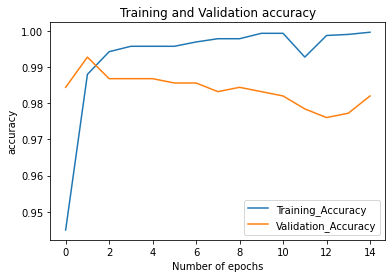

In [64]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

## SAVING THE MODEL

In [65]:
model.save('Spam_sms_classifier.h5')

## PREPROCESSING THE TEST DATASET

In [66]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

## TESTING THE MODEL

In [67]:
accuracy1 = model.evaluate(test_sequences_matrix,Y_test)

44/44 [==============================] - 4s 79ms/step - loss: 0.1290 - accuracy: 0.9828


In [71]:
print(' Accuracy: {:0.4f}'.format(accuracy1[0],accuracy1[1]))

 Accuracy: 0.1290


## **Submitted by RANJITH V[2019504570]**